# DSCI 303 - Homework 07

### Mallory Stern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.txt', sep='\t')
ames = pd.read_csv('ames_housing.txt', sep='\t')
titanic = pd.read_csv('titanic.txt', sep='\t')
batting = pd.read_csv('batting.csv', sep=',')

## Problem 1: Iris Dataset

In [3]:
iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_means = iris.loc[:,['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']
                     ].groupby('species').mean()

iris_means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<function matplotlib.pyplot.show(close=None, block=None)>

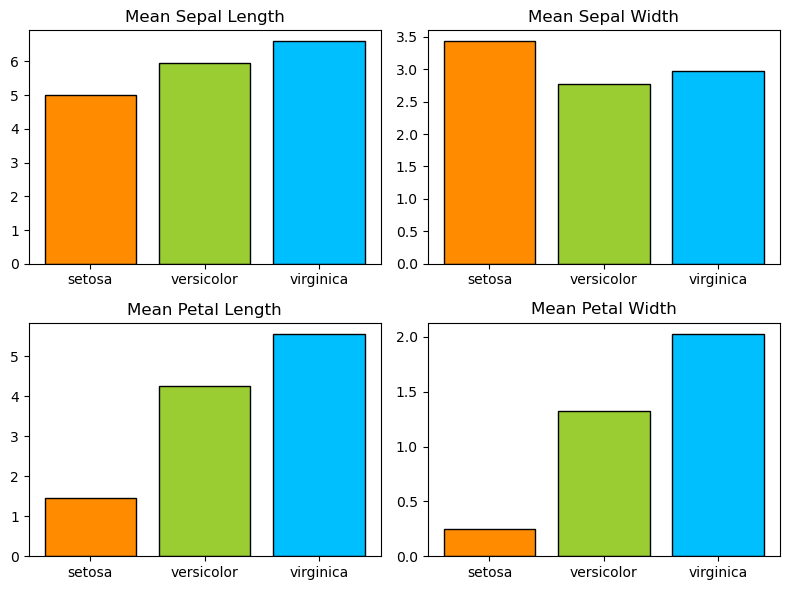

In [6]:
iris_colors = ["darkorange", "yellowgreen", "deepskyblue"]
iris_columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

plt.figure(figsize = [8, 6])

for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    plt.bar(x = iris_means.index, height = iris_means.iloc[:,i], color = iris_colors, edgecolor = 'black')
    plt.title(f'Mean {iris_columns[i]}')

plt.tight_layout()
plt.show


## Problem 2: Ames Housing - Neighborhoods

In [7]:
ames.head(8)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [8]:
ames.columns.values

array(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',

In [9]:
ames_nbhd = ames.loc[:, ['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean()
ames_nbhd = ames_nbhd.sort_values(by = "SalePrice")
ames_nbhd.head(5)

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


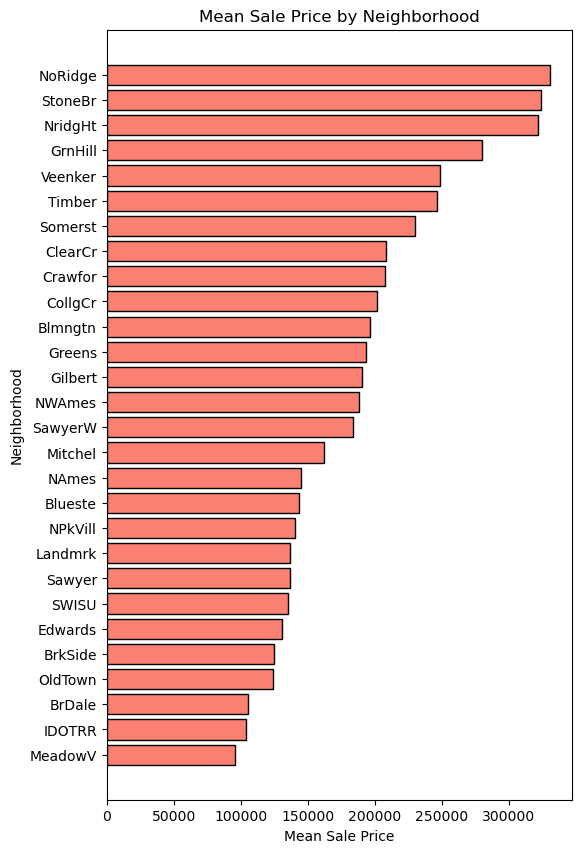

In [10]:
plt.figure(figsize = [6, 10])

plt.barh(y = ames_nbhd.index, width = ames_nbhd.loc[:, 'SalePrice'], color = 'salmon', edgecolor = 'black')
plt.xlabel('Mean Sale Price')
plt.ylabel('Neighborhood')
plt.title('Mean Sale Price by Neighborhood')
plt.show()

## Problem 3: Ames Housing - House Styles

In [11]:
ames_style = ames.loc[:, ['House Style', 'SalePrice']].groupby('House Style').count()
ames_style.rename(columns = {'SalePrice' : 'Count'}, inplace = True)
ames_style

,Count
House Style,
1.5Fin,314
1.5Unf,19
1Story,1481
2.5Fin,8
2.5Unf,24
2Story,873
SFoyer,83
SLvl,128


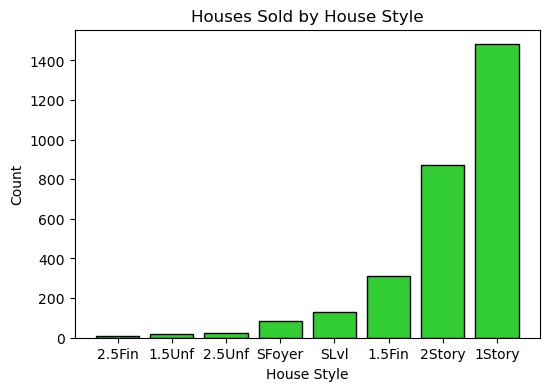

In [12]:
ames_style = ames_style.sort_values(by = "Count")

plt.figure(figsize = [6, 4])

plt.bar(x = ames_style.index, height = ames_style.loc[: , 'Count'], color = 'limegreen', edgecolor = 'black')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Houses Sold by House Style')
plt.show()


## Problem 4: Titanic Dataset - Survival Rates

In [13]:
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [14]:
survived = titanic.loc[: , 'Survived'].mean()

print(f'Proportion of Passengers who survived: {survived:.4f}')

Proportion of Passengers who survived: 0.3856


In [15]:
surv_rates = titanic.loc[: , ['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()
surv_rates

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

## Problem 5: Titanic Dataset - Sex Distribution by Class and Outcome

In [16]:
#employee_df.loc[:,'pay'] = employee_df.loc[:,'rate'] * employee_df.loc[:,'hours']

titanic.loc[:, 'Female'] = titanic.loc[:, 'Sex'] == "female"
titanic.loc[:, 'Male'] = titanic.loc[:, 'Sex'] == "male"

titanic.loc[:, 'Female'] = titanic.loc[:, 'Female'].astype(int)
titanic.loc[:, 'Male'] = titanic.loc[:, 'Male'].astype(int)

titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,0,1


In [17]:
sex_dist_by_class = titanic.loc[:, ['Pclass', 'Female', 'Male']].groupby('Pclass').sum()
sex_dist_by_class

,Female,Male
Pclass,,
1,94,122
2,76,108
3,144,343


In [18]:
sex_dist_by_outcome = titanic.loc[:, ['Survived', 'Female', 'Male']].groupby('Survived').sum()
sex_dist_by_outcome

,Female,Male
Survived,,
0,81,464
1,233,109


## Problem 6: Batting Data - Home Runs

In [19]:
batting.head(8)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,0.0
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,0.0
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0


In [20]:
batting.columns.values

array(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP'], dtype=object)

In [21]:
total_hr = batting.loc[:, ['teamID', 'yearID', 'HR']].groupby(['teamID', 'yearID'], as_index = False).sum()
total_hr = total_hr.sort_values(by = 'HR', ascending = False)
total_hr.head(10)

,teamID,yearID,HR
1840,NYA,2018,267
2384,SEA,1997,264
2722,TEX,2005,260
2771,TOR,2010,257
125,BAL,1996,257
145,BAL,2016,253
1273,HOU,2000,249
2718,TEX,2001,246
1834,NYA,2012,245
2383,SEA,1996,245


In [22]:
avg_hr = total_hr.loc[:, ['teamID', 'HR']].groupby('teamID').mean()
avg_hr = avg_hr.sort_values(by = 'HR', ascending = False)
avg_hr.head(10)

,HR
teamID,
COL,181.769231
MIL,180.761905
ML1,171.538462
ARI,170.142857
TOR,168.452381
ANA,165.500000
TEX,163.851064
TBA,162.714286
OAK,158.196078


## Problem 7: Batting Data - Batting Averages

In [23]:
batting_avg = batting.loc[:, ['teamID', 'yearID', 'H', 'AB']].groupby(['teamID', 'yearID']).sum()
batting_avg.loc[:, 'BA'] = batting_avg.loc[:, 'H'] / batting_avg.loc[:, 'AB']
batting_avg = batting_avg.sort_values(by = 'BA', ascending = False)
batting_avg.head(10)

H    AB        BA
teamID yearID                      
PHI    1894    1780  5088  0.349843
BLN    1894    1647  4799  0.343196
BS1    1873     933  2748  0.339520
CHN    1876     926  2748  0.336972
BSN    1894    1658  5011  0.330872
PHI    1895    1664  5037  0.330355
BLN    1896    1548  4719  0.328036
       1897    1584  4872  0.325123
       1895    1530  4725  0.323810
BS1    1875    1128  3515  0.320910

## Problem 8: Batting Data - Cardinals vs. Cubs

In [24]:
sel = (batting.loc[(batting.yearID >= 1900) & (batting.teamID == 'SLN') ,:])
stl_batting = sel.loc[:, ['yearID', 'H', 'AB', 'HR']].groupby('yearID').sum()

stl_batting.loc[:, 'BA'] = stl_batting.loc[:, 'H'] / stl_batting.loc[:, 'AB']

sel = (batting.loc[(batting.yearID >= 1900) & (batting.teamID == 'CHN') ,:])
chi_batting = sel.loc[:, ['yearID', 'H', 'AB', 'HR']].groupby('yearID').sum()

chi_batting.loc[:, 'BA'] = chi_batting.loc[:, 'H'] / chi_batting.loc[:, 'AB']

stl_batting

,H,AB,HR,BA
yearID,,,,
1900,1420,4877,36,0.291163
1901,1430,5039,39,0.283786
1902,1226,4751,10,0.258051
1903,1176,4689,8,0.250800
1904,1292,5104,24,0.253135
...,...,...,...,...
2014,1371,5426,105,0.252672
2015,1386,5484,137,0.252735
2016,1415,5548,225,0.255047


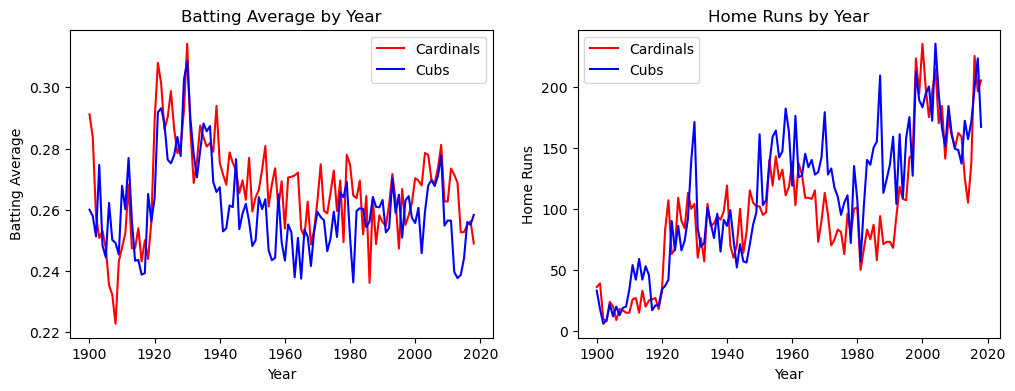

In [30]:
plt.figure(figsize = [12, 4])
years = range(1900, 2018)



plt.subplot(1, 2, 1)
plt.plot(stl_batting.index, stl_batting.BA, label = 'Cardinals', color = 'red');
plt.plot(chi_batting.index, chi_batting.BA, label = 'Cubs', color = 'blue')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average by Year')

plt.subplot(1, 2, 2)
plt.plot(stl_batting.HR, label = 'Cardinals', color = 'red');
plt.plot(chi_batting.HR, label = 'Cubs', color = 'blue')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Home Runs')
plt.title('Home Runs by Year')
plt.show()

In [26]:
BAresult = np.mean(stl_batting.loc[:, 'BA'] > chi_batting.loc[:, 'BA'])
print(f'{BAresult:.4f}')

0.7143


In [27]:
HRresult = np.mean(stl_batting.loc[:, 'HR'] > chi_batting.loc[:, 'HR'])
print(f'{HRresult:.4f}')

0.3782
